## SVM决策过程可视化

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

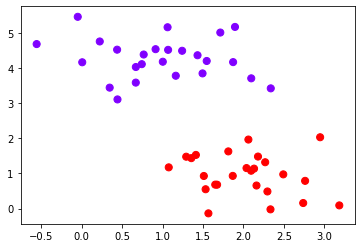

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50,cmap='rainbow')
#获取子图
ax = plt.gca()

In [6]:
#构成网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()#获取最大值和最小值

In [8]:
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)

In [11]:
#将x, y 复制成x.shape * y.shape的特征矩阵
axisx, axisy = np.meshgrid(axisx, axisy)

In [18]:
axisy.shape

(30, 30)

In [14]:
#得到网格
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T

In [15]:
xy

array([[-0.75417405, -0.43660962],
       [-0.61148501, -0.43660962],
       [-0.46879596, -0.43660962],
       ...,
       [ 3.09843009,  5.77275628],
       [ 3.24111914,  5.77275628],
       [ 3.38380818,  5.77275628]])

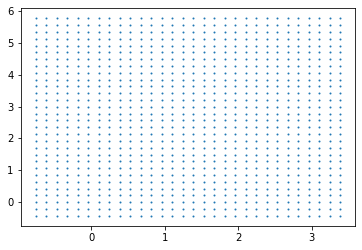

In [19]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap="rainbow")

In [34]:
#建模并计算出决策边界
clf = SVC(kernel="linear").fit(x, y)
#返回每个输入样本到决策边界距离
z = clf.decision_function(xy).reshape(axisx.shape)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'level'
  """


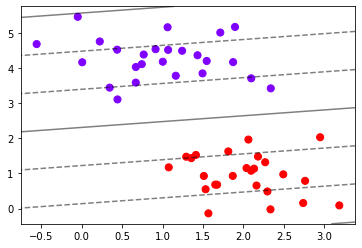

In [35]:
#画出决策边界和平行的超平面，用来画等高线
plt.contour(axisx, axisy, z, colors='k'
           ,level=[-1, 0, 1] #画出三条等高线
           , alpha=.5
           ,linestyles=["--","-","--"])
#plt.set_xlim(xlim)
#plt.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="rainbow")


In [36]:
clf.predict(x) #返回预测结果
clf.score(x, y)
clf.support_vectors_ #返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [37]:
clf.n_support_ #每个类支持向量个数

array([2, 1])

##  推广到非线性情况

In [42]:
from sklearn.datasets import make_circles
x1, y1 = make_circles(100, factor=.1, noise=.1)

In [45]:
y1.shape

(100,)

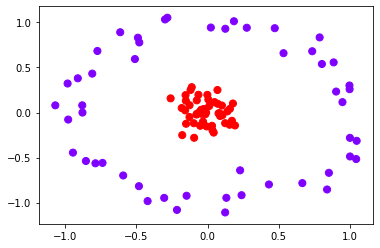

In [46]:
plt.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, cmap="rainbow")
plt.show()

In [49]:
r = np.exp(-(x1**2).sum(1)) #添加一个维度

In [50]:
rlim = np.linspace(min(r), max(r), 100)

In [52]:
from mpl_toolkits import mplot3d

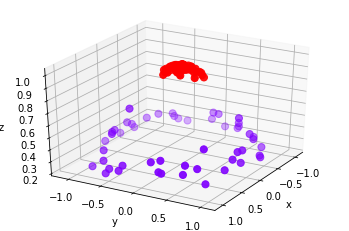

In [56]:
def plot_3d(elev=30, azim=30, X=x1, Y=y1):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(x1[:, 0], x1[:, 1], r, c=y1, s=50, cmap="rainbow")
    ax.view_init(elev=elev, azim=azim)#elev上下旋转角度，xzim平行旋转角度
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()
plot_3d()

增加一个维度来使得其线性可分

In [58]:
import pandas as pd

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [69]:
x1.shape

(100, 2)

In [78]:
X = pd.DataFrame(x1)
R = pd.DataFrame(r)
Z = pd.concat([X, R], axis=1)
CLF = SVC(kernel='linear').fit(Z, y1)

In [79]:
CLF.score(Z, y1)

1.0

In [80]:
#使用不同的kernel可以得到不同的边界线